In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [59]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [60]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData['TotalCharges'] = churnData['TotalCharges'].round(2)

In [61]:
#X,y Split

X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

X.isnull().sum()

tenure             0
SeniorCitizen      0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [62]:
# Replace occurring nulls in  TotalCharges that came up due to Rounding the float

X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())

/var/folders/41/cwvbc7bx649ccn9bbdkzvjfw0000gn/T/ipykernel_11809/285789420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())


In [63]:
encoding = {'Yes': 1, 'No': 0}
churnData['Churn'] = churnData['Churn'].map(encoding)

y = churnData[['Churn']]
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [64]:
pd.DataFrame(y).isna().sum()

Churn    0
dtype: int64

In [65]:
#Training, Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
# Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [67]:
pd.DataFrame(X_train_scaled).isna().any()

0    False
1    False
2    False
3    False
dtype: bool

## logistic Regression


In [68]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.787895,0.805536
1,Precision,0.646829,0.697211
2,Recall,0.443182,0.469169


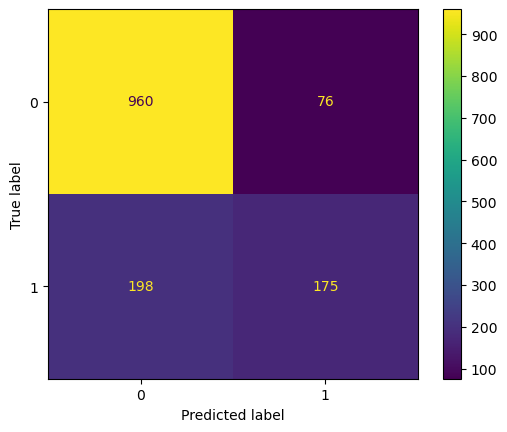

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

## KNN Classifier

In [71]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred_test = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Error_metric,Train,Test
0,Accuracy,0.98864,0.740241
1,Precision,0.97861,0.510386
2,Recall,0.97861,0.461126


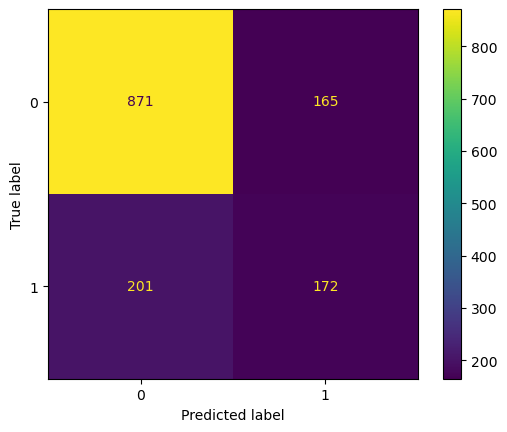

In [75]:
cm = confusion_matrix(y_test, y_pred_test, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()